In [55]:
#Script Purpose: Plot IV curve in upward, downward and average of the two
#Takes in .fcd file from Scribner software
#Author: Shan Kutagulla

In [56]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import openpyxl
import numpy as np
import scipy

In [57]:
AREA=25; #area of MEA in cm2

In [61]:
#administrative stuff: read in data and index
filename="/Users/shanmukhkutagulla/My Drive/Fuel Cell Docs/Polarization-12-17-21.fcd"
data=pd.read_csv(filename, skiprows=47, delimiter="\t", usecols=["E_Stack (V)","I (A)"])
data=data.drop(0,axis=0).reindex()

In [65]:
#Normalize data for area of cell and determine the turnpoint in dataset of voltage
data["I (A/cm2)"]=data["I (A)"]/AREA
turnpoint=data["E_Stack (V)"].idxmin()

In [66]:
#extract each sweep direction
downwards_pol=data.iloc[0:turnpoint]
downwards_pol=downwards_pol.reset_index(drop=True)

#for upwards, have to reindex, flip to make compatible for averaging and reset index once more
upwards_pol=data.iloc[turnpoint-1::]
upwards_pol=upwards_pol.reset_index(drop=True)
upwards_pol=upwards_pol.reindex(index=upwards_pol.index[::-1])
upwards_pol=upwards_pol.reset_index(drop=True)

#average the directions
average_pol=((downwards_pol+upwards_pol)/2).dropna()

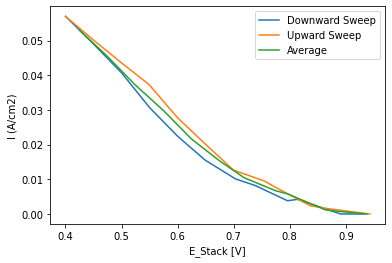

In [68]:
#plot and label graph
down_line=plt.plot(downwards_pol["E_Stack (V)"],downwards_pol["I (A/cm2)"])
up_line=plt.plot(upwards_pol["E_Stack (V)"],upwards_pol["I (A/cm2)"])
average_line=plt.plot(average_pol["E_Stack (V)"],average_pol["I (A/cm2)"])
plt.legend(['Downward Sweep','Upward Sweep', 'Average']);
plt.xlabel("E_Stack [V]");
plt.ylabel("I (A/cm2)");